## Load libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk import pos_tag  # Add this import
from nltk.corpus import stopwords
import pandas as pd  
import re  
import ast

In [2]:
# import libraries
import pandas as pd
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
nltk.download('averaged_perceptron_tagger')  # Required for pos_tag
nltk.download('stopwords')  # Required for stopwords
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('universal_tagset')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt_tab to /home/erikz/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/erikz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/erikz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/erikz/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/erikz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/erikz/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/erikz/nltk_data...
[nltk_data]   P

## Define functions

In [2]:
def parse_text_to_csv(input_file, output_csv):  
    # Initialize lists to store extracted data  
    openalexid_list = []  
    value_list = []  
    key_list = []  
    
    # Open and read the input file  
    with open(input_file, 'r') as file:  
        content = file.read()  
    
    # Split the content into chunks by the delimiter "NEXT!"  
    chunks = content.split("NEXT!")  
    
    # Process each chunk  
    for chunk in chunks:  
        if not chunk.strip():  # Skip empty chunks  
            continue  
        
        # Extract the openalexid  
        openalexid_match = re.search(r'https://openalex\.org/([^\s\n]+)', chunk)  
        openalexid = openalexid_match.group(1).strip() if openalexid_match else "N/A"  
        
        # Extract a Python dictionary  
        dict_match = re.search(r'{.*}', chunk, re.DOTALL)  # Match anything resembling a dictionary  
        if dict_match:  
            dict_str = dict_match.group(0)  
            try:  
                # Safely parse the dictionary string  
                parsed_obj = ast.literal_eval(dict_str)  
                # Ensure the parsed object is a dictionary  
                if isinstance(parsed_obj, dict):  
                    # Extract the first key and value  
                    key = next(iter(parsed_obj.keys()), "N/A")  # First key  
                    value = parsed_obj.get(key, "N/A")  # Value for the first key  
                else:  
                    key = "N/A"  
                    value = "N/A"  
            except (SyntaxError, ValueError):  
                key = "N/A"  
                value = "N/A"  
        else:  
            key = "N/A"  
            value = "N/A"  
        
        # Append extracted data to lists  
        openalexid_list.append(openalexid)  
        key_list.append(key)  
        value_list.append(value)  
    
    # Create a DataFrame from the extracted data  
    df = pd.DataFrame({  
        'openalexid': openalexid_list,  
        'value': value_list,  
        'key': key_list  
    })  
    
    # Save the DataFrame to a CSV file  
    df.to_csv(output_csv, index=False)  
    print(f"Data successfully parsed and saved to {output_csv}")  
    return df

## Define paths

## Analyze data

In [ ]:
# Example usage:  
# Ensure you replace 'input.txt' with the actual filename of your text file and 'output.csv' with the desired CSV filename.  
df_to_explore = parse_text_to_csv('../llm_output/AI_generations_fullrun_170325.out', '../llm_output/AI_generations_spreadsheet_280325.out')  

In [ ]:
df_to_explore['key'].value_counts()

In [4]:
df_generations = pd.read_csv('../llm_output/AI_generations_spreadsheet_280325.out')

In [17]:
df_abstracts = pd.read_csv('../data/abstracts_data/all_labeled2include_trainingset_plus_included_and_maybe_by_rayaan.csv')

/tmp/ipykernel_1255025/3672534890.py:1: DtypeWarning: Columns (24,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  df_abstracts = pd.read_csv('../data/abstracts_data/all_labeled2include_trainingset_plus_included_and_maybe_by_rayaan.csv')


In [18]:
df_abstracts['openalexid'] = df_abstracts.id.str.split('/').str[3]

In [19]:
df_abstracts_selected = df_abstracts[['id', 'openalexid', 'primary_topic', 'doi', 'title', 'abstract']]

In [20]:
### AI generations

In [21]:
df_to_check = df_abstracts_selected.merge(df_generations, how='outer', on='openalexid')

In [22]:
df_to_check.columns = ['id', 'openalexid', 'primary_topic', 'doi', 'title', 'abstract', 'AI_gen_key_words', 'AI_gen']

In [23]:
df_to_check.to_csv('../llm_output/AI_generations_spreadsheet_280325_2check_all.out', index=False)  

In [24]:
df_to_check.head(100).to_csv('../llm_output/AI_generations_spreadsheet_280325_2check_all_head.out', index=False)  

In [ ]:
### AI use cases

In [9]:
df_to_check2 = df_abstracts_selected.merge(df_use_cases, how='outer', on='openalexid')

In [11]:
df_to_check2.to_csv('../llm_output/AI_use_cases_spreadsheet_020425_2check_all.out', index=False)  

In [12]:
df_to_check2.head(100).to_csv('../llm_output/AI_use_cases_spreadsheet_020425_2check_all_head.out', index=False)  

## Summary stats manually verified

In [3]:
df_to_check = pd.read_csv('../llm_output/AI_generations_spreadsheet_280325_2check_all.out')  

In [3]:
df_verified1 = pd.read_csv('../llm_output/AI_generations_spreadsheet_280325_2check_all_head.out')

In [4]:
df_verified1.Is_key_words.value_counts()

Is_key_words
1.0    71
0.0     5
Name: count, dtype: int64

In [5]:
71/76

0.9342105263157895

In [6]:
df_verified1.Is_gen.value_counts()

Is_gen
1.0    67
0.0     9
Name: count, dtype: int64

In [7]:
67/76

0.881578947368421

## Wordclouds

### AI generations

In [4]:
df_to_check

id   openalexid  primary_topic  \
0      https://openalex.org/W1528805538  W1528805538            NaN   
1      https://openalex.org/W1797455416  W1797455416            NaN   
2      https://openalex.org/W2217278910  W2217278910            NaN   
3      https://openalex.org/W2225093001  W2225093001            NaN   
4      https://openalex.org/W2409918409  W2409918409            NaN   
...                                 ...          ...            ...   
18940  https://openalex.org/W4406062321  W4406062321            NaN   
18941  https://openalex.org/W4406067725  W4406067725            NaN   
18942  https://openalex.org/W4406067735  W4406067735            NaN   
18943  https://openalex.org/W4406074026  W4406074026            NaN   
18944   https://openalex.org/W857330509   W857330509            NaN   

                                                doi  \
0         https://doi.org/10.1609/aiide.v10i1.12721   
1               https://doi.org/10.54941/ahfe100330   
2      https://doi.org/10.31838/ijpr/2020.12.01.223   
3          https://doi.org/10.1609/aiide.v9i1.12684   
4                https://doi.org/10.18260/1-2--2880   
...                                             ...   
18940             https://doi.org/10.54097/cac4s112   
18941         https://doi.org/10.22381/jsme11320231   
18942        https://doi.org/10.55217/101.v17i2.875   
18943     https://doi.org/10.48550/arxiv.2407.16614   
18944       https://doi.org/10.1609/aaai.v26i1.8447   

                                                   title  \
0      Emotion-Based Interactive Storytelling with Ar...   
1      From ICT-Machine Determinism to a Socio-ICT Or...   
2                  Intelligent Traffic Management System   
3      Evaluating Planning-Based Experience Managers ...   
4      A Real Introduction To Engineering And Biotech...   
...                                                  ...   
18940  Innovative Application and Development Trend o...   
18941  Transforming Urban Landscapes through Generati...   
18942  Investigating sustainable development and envi...   
18943  Mobile Technology: A Panacea to Food Insecurit...   
18944  Interactive Narrative: A Novel Application of ...   

                                                abstract  \
0      Artificial Intelligence (AI) techniques have b...   
1      The transfer of knowledge between individuals,...   
2      Urbanization has presented opportunities of pr...   
3      Artificial intelligence (AI) techniques have b...   
4      Abstract NOTE: The first page of text has been...   
...                                                  ...   
18940  Building Information Modeling (BIM) has fundam...   
18941                                                NaN   
18942  This study explores the effectiveness of the W...   
18943  Over time, agriculture is the most consistent ...   
18944  Game Artificial Intelligence (Game AI) is a su...   

                                        AI_gen_key_words  \
0                                                     []   
1                                  ['Foundation Models']   
2                                             ['YOLOv3']   
3                             ['AI planning techniques']   
4                                                     []   
...                                                  ...   
18940    ['Artificial Intelligence', 'Machine Learning']   
18941                                                NaN   
18942  ['Digital Tools', 'Artificial Intelligence', '...   
18943                                             ['AI']   
18944                                                 []   

                                          AI_gen  
0                                          Other  
1                           New Generation of AI  
2      Classic AI & Neural Network Architectures  
3                                          Other  
4                                          Other  
...                                          ...  
189

In [8]:
from wordcloud import WordCloud

In [9]:
def text_preprocess(text):
    if pd.isna(text):
        return []  # or whatever default value you want
        
    toks = word_tokenize(text)
    toks = [t.replace(",", "") for t in toks]
    toks = [t.replace(".", "") for t in toks]
    toks = [t.replace("-", "") for t in toks]
    stop = stopwords.words('english') + ["'s","could","would"]
    punc = string.punctuation + "'""" + "``" + "''"
    toks = [t.lower() for t in toks if t.lower() not in stop]
    toks = [t for t in toks if t not in punc]
    toks = [t for t in toks if t != '']
    sent_pos = pos_tag(toks,tagset='universal')
    sent_pos_updated = []
    for item in sent_pos:
        tok = item[0]
        pos = item[1]
        if pos not in [".","NUM"]:
            item_tuple = (tok,pos)
            sent_pos_updated.append(item_tuple)
    def get_part_of_speech(pos):
        if pos == 'NOUN':
            part_of_speech = 'n'
        elif pos == 'VERB':
            part_of_speech = 'v'
        elif pos == 'ADJ':
            part_of_speech = 'a'
        elif pos == 'ADV':
            part_of_speech = 'r'
        else:
            part_of_speech = 's'
        return part_of_speech
    wnl = nltk.WordNetLemmatizer()
    lemmans = []
    for (w,p) in sent_pos_updated:
        part_of_speech = get_part_of_speech(p)
        lemman = wnl.lemmatize(w,pos=part_of_speech)
        lemmans.append(lemman)
    text_clean = " ".join(lemmans)
    return text_clean

In [10]:
df_to_check['AI_gen_key_words'] = df_to_check['AI_gen_key_words'].fillna('')  # Convert NaNs to empty strings

In [11]:
df_to_check['keywords_preprocessed'] = df_to_check['AI_gen_key_words'].apply(lambda x: text_preprocess(x))

In [19]:
df_to_check.to_csv('../llm_output/AI_with_keywords_filtered.out', index=False)  

### Everything

In [13]:
from wordcloud import WordCloud

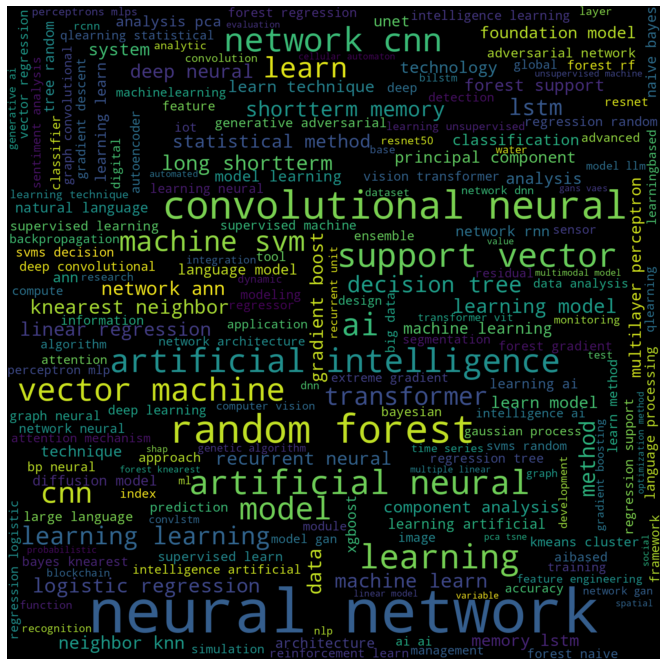

In [15]:
text = ' '.join(df_to_check['keywords_preprocessed'].astype(str))  # Convert Series to single string  

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1600, height = 1600).generate(text)

# Display the generated image with a larger figure size  
plt.figure(figsize=(12, 12))  # Set figure size (width, height in inches)  
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  # Hide axes  
plt.show()  # Show the word cloud

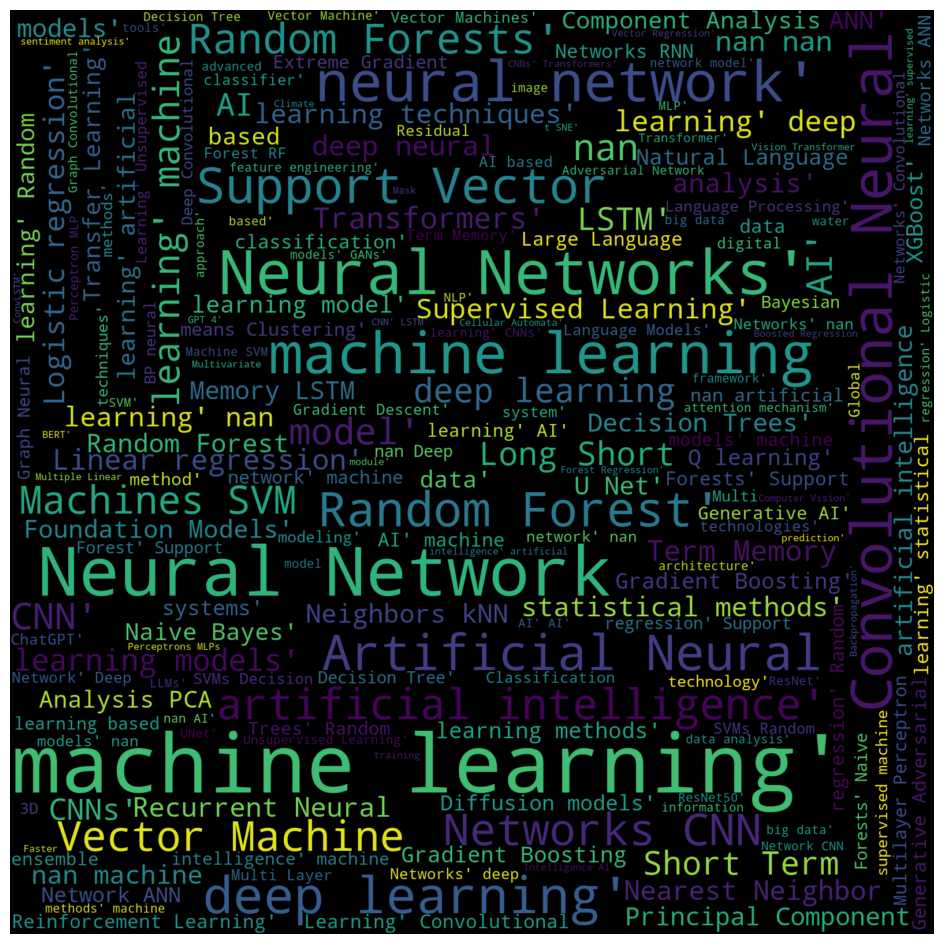

In [30]:
text = ' '.join(df_to_check['value'].astype(str))  # Convert Series to single string  

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1600, height = 1600).generate(text)

# Display the generated image with a larger figure size  
plt.figure(figsize=(12, 12))  # Set figure size (width, height in inches)  
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  # Hide axes  
plt.show()  # Show the word cloud

In [5]:
df_to_check_gen1 = df_to_check[df_to_check['AI_gen'] == 'Classic Machine Learning']

In [6]:
df_to_check_gen1

id   openalexid  primary_topic  \
18     https://openalex.org/W2725324378  W2725324378            NaN   
21     https://openalex.org/W2891162071  W2891162071            NaN   
24     https://openalex.org/W2917321954  W2917321954            NaN   
25     https://openalex.org/W2922771925  W2922771925            NaN   
27     https://openalex.org/W2947720450  W2947720450            NaN   
...                                 ...          ...            ...   
18918  https://openalex.org/W4405962918  W4405962918            NaN   
18926  https://openalex.org/W4406000288  W4406000288            NaN   
18931  https://openalex.org/W4406011946  W4406011946            NaN   
18937  https://openalex.org/W4406031615  W4406031615            NaN   
18940  https://openalex.org/W4406062321  W4406062321            NaN   

                                                   doi  \
18           https://doi.org/10.1609/aiide.v12i1.12855   
21                 https://doi.org/10.18260/1-2--29638   
24             https://doi.org/10.1145/3574318.3574319   
25                  https://doi.org/10.1111/ecno.12181   
27                  https://doi.org/10.3390/rs12060900   
...                                                ...   
18918          https://doi.org/10.3126/janr.v7i1.72939   
18926              https://doi.org/10.1017/eds.2024.42   
18931  https://doi.org/10.4018/979-8-3693-8684-2.ch004   
18937        https://doi.org/10.48550/arxiv.2501.00502   
18940                https://doi.org/10.54097/cac4s112   

                                                   title  \
18     Predicting Proppian Narrative Functions from S...   
21     Identifying the Best Admission Criteria for Da...   
24     Overview of the FIRE 2022 track: Information R...   
25     GDP‐network CoVaR: A tool for assessing growth...   
27     High-Resolution Inundation Mapping for Heterog...   
...                                                  ...   
18918  Soil organic carbon and its influencing factor...   
18926  A temporal stochastic bias correction using a ...   
18931  Featuring Wave and Tidal Energy Conversion Wit...   
18937  Exploring Physics-Informed Neural Networks for...   
18940  Innovative Application and Development Trend o...   

                                                abstract  \
18     Computational narrative systems usually requir...   
21     Abstract Big data is taking the world by storm...   
24     Microblogging sites such as Twitter play an im...   
25     Abstract We propose a tool to predict risks to...   
27     Floods are one of the most wide-spread, freque...   
...                                                  ...   
18918  The importance of soil organic carbon (SOC) in...   
18926  Abstract Climate models are biased with respec...   
18931  Artificial intelligence (AI) and machine learn...   
18937  In response to climate change, assessing crop ...   
18940  Building Information Modeling (BIM) has fundam...   

                                        AI_gen_key_words  \
18     ['supervised machine learning', 'statistical m...   
21     ['statistical methods', 'machine learning tech...   
24     ['Logistic Regression', 'Support Vector Machin...   
25                                     ['NETS', 'CoVaR']   
27        ['Supervised Machine Learning', 'classifiers']   
...                                                  ...   
18918                               ['machine learning']   
18926                               ['attention models']   
18931                         ['AI', 'machine learning']   
18937  ['machine learning models', 'statistical metho...   
18940    ['Artificial Intelligence', 'Machine Learning']   

                         AI_gen  
18     Classic Machine Learning  
21     Classic Machine Learning  
24     Classic Machine Learning  
25     Classic Machine Learning  
27     Classic Machine Learning  
...                         ...  
18918  Classic Machine Learning  
18926  Classic Machine Learning  
18931  Classic Mac

### Classic ML

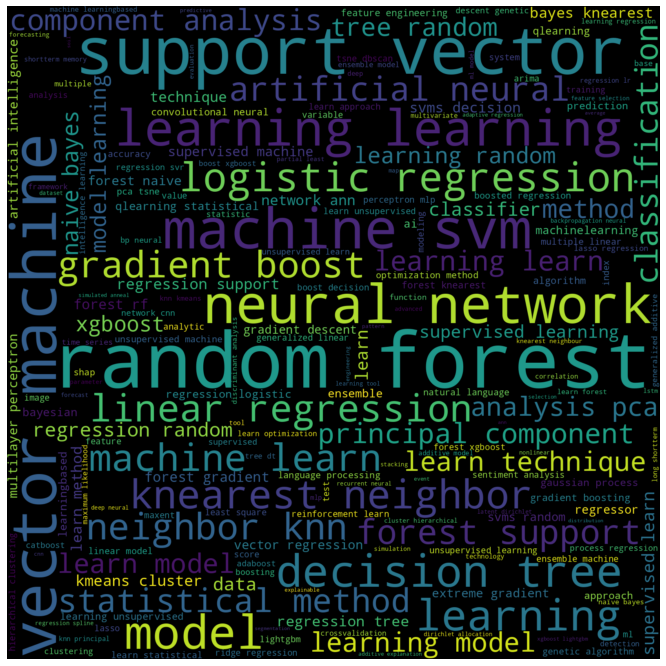

In [18]:
text = ' '.join(df_to_check_gen1['keywords_preprocessed'].astype(str))  # Convert Series to single string  

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1600, height = 1600).generate(text)

# Display the generated image with a larger figure size  
plt.figure(figsize=(12, 12))  # Set figure size (width, height in inches)  
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  # Hide axes  
plt.show()  # Show the word cloud

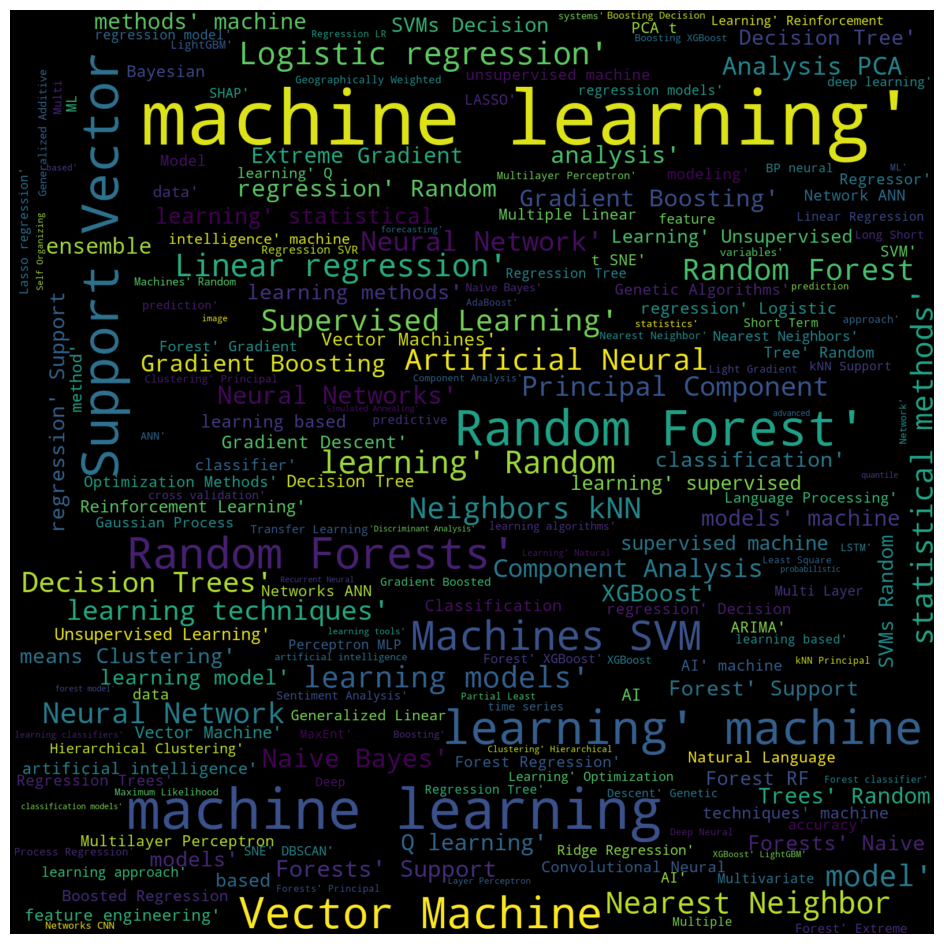

In [34]:
text = ' '.join(df_to_check_gen1['value'].astype(str))  # Convert Series to single string  

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1600, height = 1600).generate(text)

# Display the generated image with a larger figure size  
plt.figure(figsize=(12, 12))  # Set figure size (width, height in inches)  
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  # Hide axes  
plt.show()  # Show the word cloud

### Classic DL

In [7]:
df_to_check_gen2 = df_to_check[  
    (df_to_check['AI_gen'] == 'Classic AI & Neural Network Architectures') |   
    (df_to_check['AI_gen'] == 'Classic Deep Learning')  
]  

In [8]:
df_to_check_gen2

id   openalexid  primary_topic  \
2      https://openalex.org/W2217278910  W2217278910            NaN   
8      https://openalex.org/W2501897184  W2501897184            NaN   
9      https://openalex.org/W2527395255  W2527395255            NaN   
20     https://openalex.org/W2887300797  W2887300797            NaN   
23     https://openalex.org/W2906822812  W2906822812            NaN   
...                                 ...          ...            ...   
18928  https://openalex.org/W4406001621  W4406001621            NaN   
18930  https://openalex.org/W4406002125  W4406002125            NaN   
18933  https://openalex.org/W4406012149  W4406012149            NaN   
18934  https://openalex.org/W4406012186  W4406012186            NaN   
18943  https://openalex.org/W4406074026  W4406074026            NaN   

                                                   doi  \
2         https://doi.org/10.31838/ijpr/2020.12.01.223   
8             https://doi.org/10.1201/9781003078630-86   
9          https://doi.org/10.5370/kiee.2020.69.7.1040   
20                https://doi.org/10.2139/ssrn.3685748   
23         https://doi.org/10.1109/jstars.2020.3011907   
...                                                ...   
18928            https://doi.org/10.31127/tuje.1530593   
18930     https://doi.org/10.35313/jtospolban.v4i2.137   
18933  https://doi.org/10.4018/979-8-3693-8684-2.ch009   
18934  https://doi.org/10.4018/979-8-3693-8684-2.ch005   
18943        https://doi.org/10.48550/arxiv.2407.16614   

                                                   title  \
2                  Intelligent Traffic Management System   
8      Invited lecture: A real time early warning and...   
9      A Development of Rose Leaf Disease Classificat...   
20     Modelling Systemic Risk Using Neural Network Q...   
23     Deepti: Deep-Learning-Based Tropical Cyclone I...   
...                                                  ...   
18928  Using Artificial Neural Networks for Predictin...   
18930  Pro-Environmental Behaviour in Tourism: A Syst...   
18933  Role of Artificial Intelligence in the Study o...   
18934  Heatwave Prediction on Era5 Data Using Deep Le...   
18943  Mobile Technology: A Panacea to Food Insecurit...   

                                                abstract  \
2      Urbanization has presented opportunities of pr...   
8      Harmful algal blooms (HAB) can lead to great e...   
9      The classification of plant disease by images ...   
20     We propose a novel approach to calibrate the c...   
23     Tropical cyclones are one of the costliest nat...   
...                                                  ...   
18928  Flood risks in Artvin, Turkey, have become a c...   
18930  As one of the largest global economic sectors,...   
18933  There is no universal definition of the term B...   
18934  This chapter seeks to establish the usefulness...   
18943  Over time, agriculture is the most consistent ...   

                                        AI_gen_key_words  \
2                                             ['YOLOv3']   
8                         ['artificial neural networks']   
9      ['convolutional neural networks', 'deep learni...   
20             ['quantile regression', 'neural network']   
23     ['Deep-learning-based', 'Infrared satellite im...   
...                                                  ...   
18928              ['Artificial Neural Networks (ANNs)']   
18930                                             ['AI']   
18933                                                 []   
18934                          ['CNNs', 'RNNs', 'LSTMs']   
18943                                             ['AI']   

                                          AI_gen  
2      Classic AI & Neural Network Architectures  
8      Classic AI & Neural Network Architectures  
9      Classic AI & Neural Network Architectures  
20     Classic AI & Neural Network Architectures  
23                         Classic Deep Learning  
...               

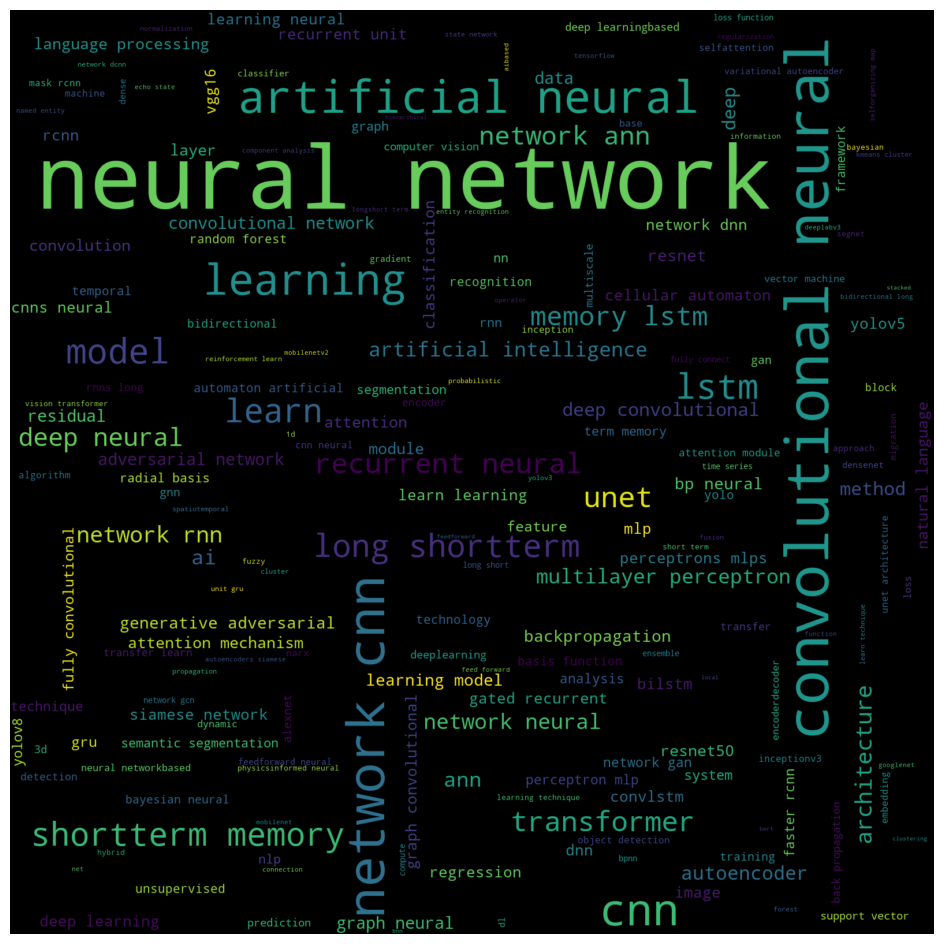

In [79]:
text = ' '.join(df_to_check_gen2['keywords_preprocessed'].astype(str))  # Convert Series to single string  

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1600, height = 1600).generate(text)

# Display the generated image with a larger figure size  
plt.figure(figsize=(12, 12))  # Set figure size (width, height in inches)  
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  # Hide axes  
plt.show()  # Show the word cloud

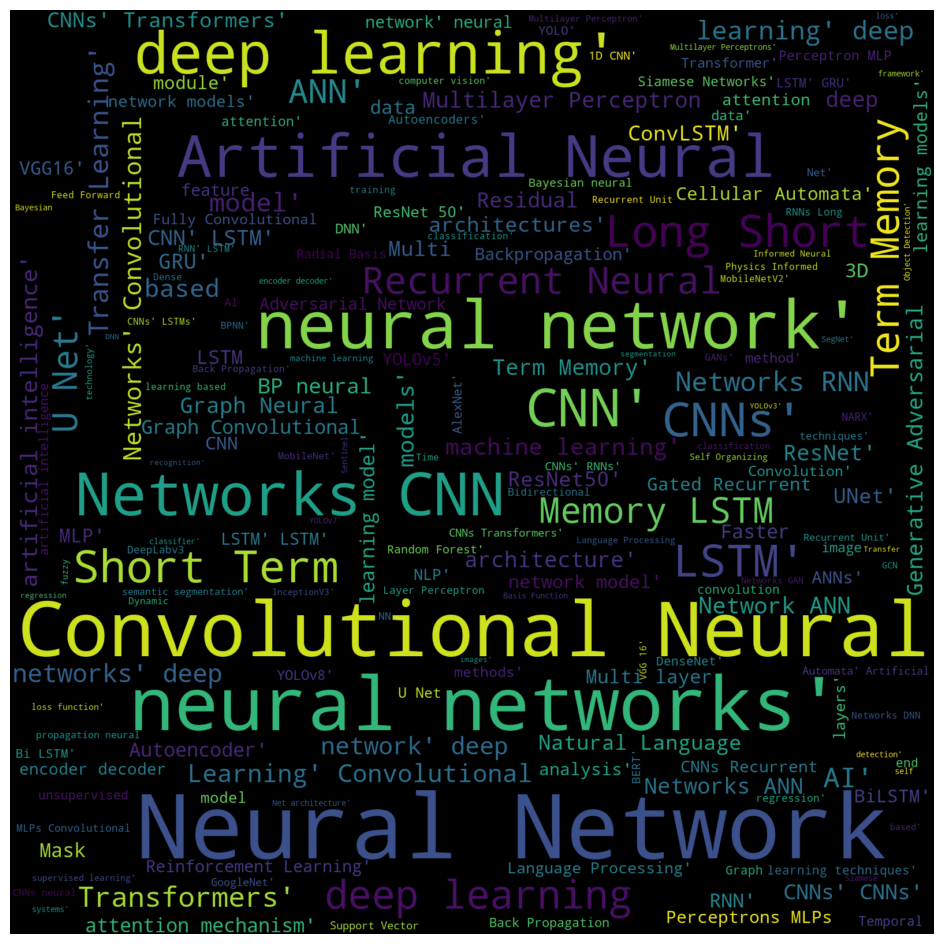

In [45]:
text = ' '.join(df_to_check_gen2['value'].astype(str))  # Convert Series to single string  

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1600, height = 1600).generate(text)

# Display the generated image with a larger figure size  
plt.figure(figsize=(12, 12))  # Set figure size (width, height in inches)  
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  # Hide axes  
plt.show()  # Show the word cloud

### New AI

In [9]:
df_to_check_gen3 = df_to_check[df_to_check['AI_gen'] == 'New Generation of AI']

In [10]:
df_to_check_gen3

id   openalexid  primary_topic  \
1      https://openalex.org/W1797455416  W1797455416            NaN   
5      https://openalex.org/W2428222171  W2428222171            NaN   
6      https://openalex.org/W2439525429  W2439525429            NaN   
22     https://openalex.org/W2896182080  W2896182080            NaN   
37     https://openalex.org/W2993514765  W2993514765            NaN   
...                                 ...          ...            ...   
18921  https://openalex.org/W4405975791  W4405975791            NaN   
18923  https://openalex.org/W4405990889  W4405990889            NaN   
18935  https://openalex.org/W4406024997  W4406024997            NaN   
18938  https://openalex.org/W4406034046  W4406034046            NaN   
18942  https://openalex.org/W4406067735  W4406067735            NaN   

                                                  doi  \
1                 https://doi.org/10.54941/ahfe100330   
5                 https://doi.org/10.18260/1-2--17251   
6      https://doi.org/10.3390/books978-3-7258-0106-0   
22              https://doi.org/10.5040/9781350258587   
37               https://doi.org/10.1029/2019ms002002   
...                                               ...   
18921       https://doi.org/10.1101/2024.12.24.630267   
18923   https://doi.org/10.53022/oarjms.2023.5.2.0020   
18935    https://doi.org/10.58557/eduinsights.v2i2.90   
18938         https://doi.org/10.33425/2639-9474.1266   
18942          https://doi.org/10.55217/101.v17i2.875   

                                                   title  \
1      From ICT-Machine Determinism to a Socio-ICT Or...   
5      Invited Paper - Preparing the Global Engineer:...   
6                            Biotechnology and Bioethics   
22     The Principles and Processes of Interactive De...   
37     Physically Interpretable Neural Networks for t...   
...                                                  ...   
18921  Anatomy-to-Tract Mapping: Inferring White Matt...   
18923  Internet of Things (IoT) in U.S. Smart Homes: ...   
18935  ChatGPT’s Impact on Environmental Literacy thr...   
18938  A Possibility of Application of Human Cognitiv...   
18942  Investigating sustainable development and envi...   

                                                abstract  \
1      The transfer of knowledge between individuals,...   
5      Abstract Paper ID #8368Invited Paper - Prepari...   
6      Biotechnology produces numerous and significan...   
22     <JATS1:p>This much anticipated second edition ...   
37     Neural networks have become increasingly preva...   
...                                                  ...   
18921  Diffusion tractography, a cornerstone of white...   
18923  This study presents a comprehensive review of ...   
18935  This study explores the impact of using ChatGP...   
18938  Looking into the state of the human mind and c...   
18942  This study explores the effectiveness of the W...   

                                        AI_gen_key_words                AI_gen  
1                                  ['Foundation Models']  New Generation of AI  
5                                  ['Foundation Models']  New Generation of AI  
6                            ['artificial intelligence']  New Generation of AI  
22                                                ['AI']  New Generation of AI  
37     ['Backwards optimization', 'Layerwise relevanc...  New Generation of AI  
...                                                  ...                   ...  
18921                                  ['deep learning']  New Generation of AI  
18923                                             ['AI']  New Generation of AI  
18935                                        ['ChatGPT']  New Generation of AI  
18938                                ['neural networks']  New Generation of AI  
18942  ['Digital Tools', 'Artificial Intelligence', '...  New Generation of AI  

[2341 rows x 8 columns]

In [14]:
df_to_check['AI_gen'].value_counts()

AI_gen
Classic Machine Learning                       5656
Classic AI & Neural Network Architectures      5651
Other                                          3378
New Generation of AI                           2341
Classic Deep Learning                           362
Key                                              11
class                                             8
main_class                                        5
Generative AI                                     5
classification                                    2
AI                                                2
category                                          2
Main Class                                        1
MainClass                                         1
Single-cell analysis technologies                 1
Random Forest                                     1
code                                              1
answer                                            1
ai_methods                                        1
Integ

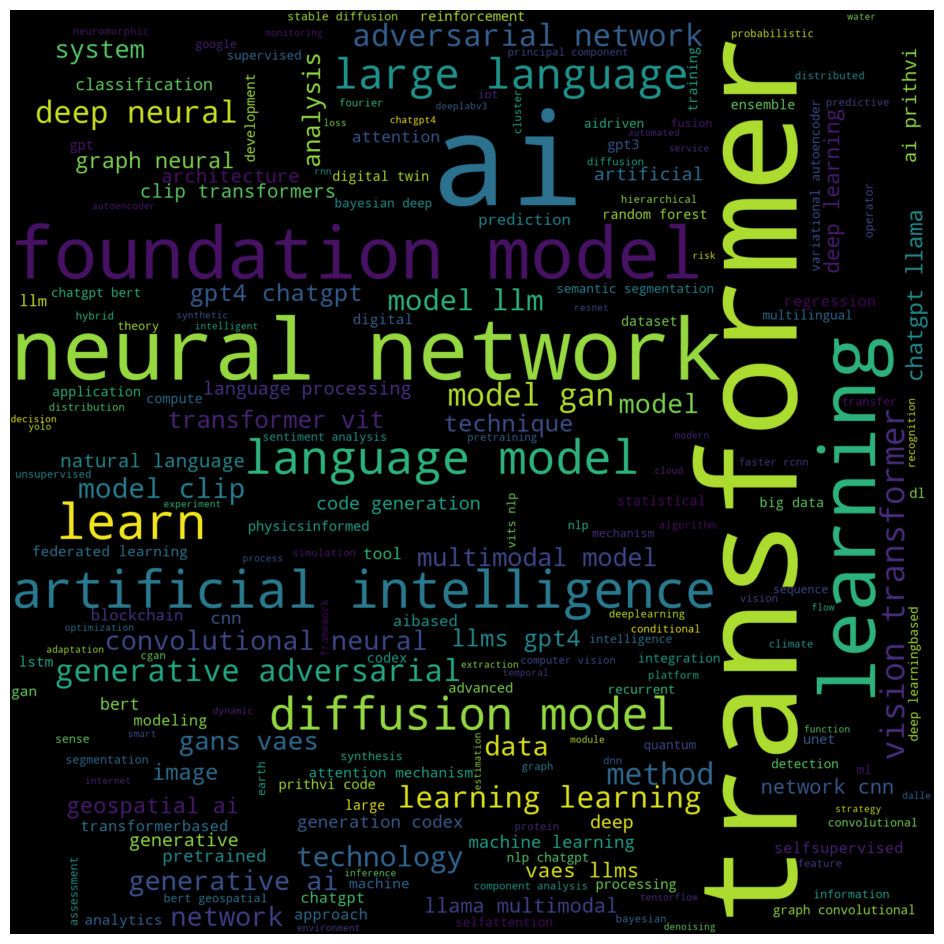

In [81]:
text = ' '.join(df_to_check_gen3['keywords_preprocessed'].astype(str))  # Convert Series to single string  

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1600, height = 1600).generate(text)

# Display the generated image with a larger figure size  
plt.figure(figsize=(12, 12))  # Set figure size (width, height in inches)  
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  # Hide axes  
plt.show()  # Show the word cloud

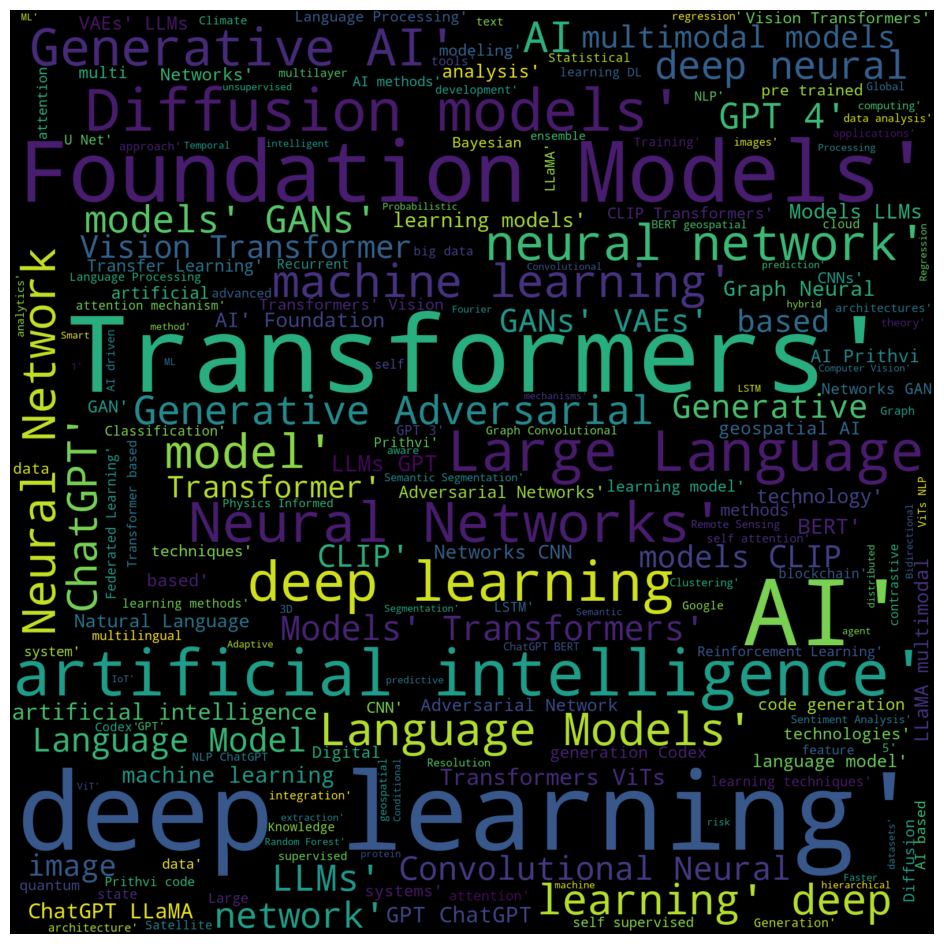

In [49]:
text = ' '.join(df_to_check_gen3['value'].astype(str))  # Convert Series to single string  

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1600, height = 1600).generate(text)

# Display the generated image with a larger figure size  
plt.figure(figsize=(12, 12))  # Set figure size (width, height in inches)  
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  # Hide axes  
plt.show()  # Show the word cloud

### Other

In [50]:
df_to_check_gen4 = df_to_check[df_to_check['key'] == 'Other']

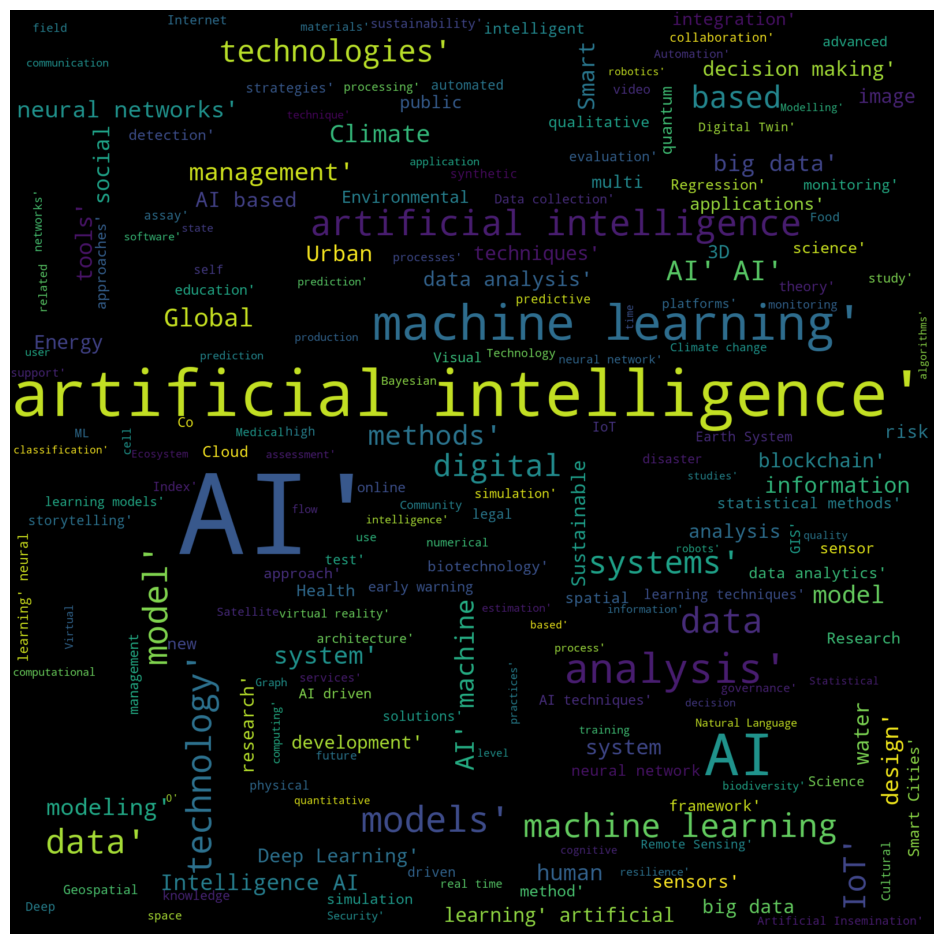

In [51]:
text = ' '.join(df_to_check_gen4['value'].astype(str))  # Convert Series to single string  

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1600, height = 1600).generate(text)

# Display the generated image with a larger figure size  
plt.figure(figsize=(12, 12))  # Set figure size (width, height in inches)  
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  # Hide axes  
plt.show()  # Show the word cloud

# Use cases

In [53]:
df_verified2 = pd.read_csv('../llm_output/AI_use_cases_spreadsheet_020425_2check_all_head.out')

In [54]:
df_verified2.Is_key_words.value_counts()

Is_key_words
1.0    55
0.0     4
Name: count, dtype: int64

In [55]:
df_verified2.Is_use_case.value_counts()

Is_use_case
1.0    36
0.0    23
Name: count, dtype: int64

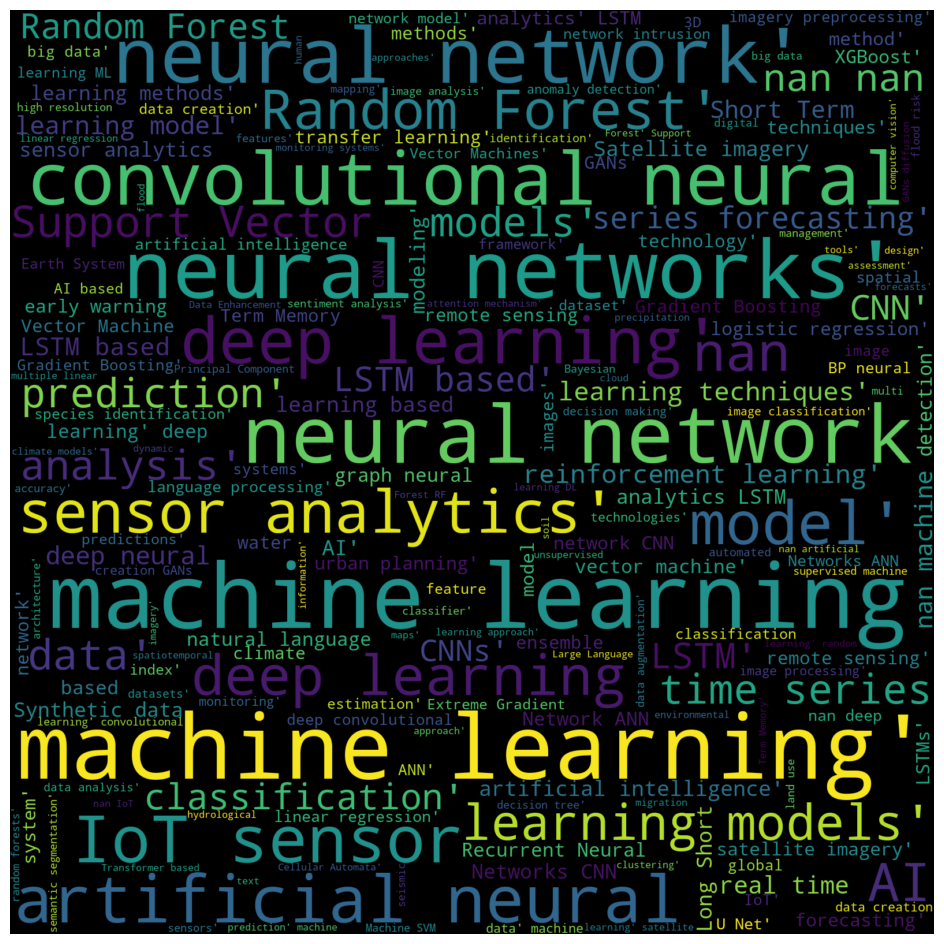

In [56]:
text = ' '.join(df_to_check2['value'].astype(str))  # Convert Series to single string  

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1600, height = 1600).generate(text)

# Display the generated image with a larger figure size  
plt.figure(figsize=(12, 12))  # Set figure size (width, height in inches)  
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  # Hide axes  
plt.show()  # Show the word cloud